<a href="https://colab.research.google.com/github/tanlitung/Data-Analytics-Assignment1/blob/master/Data_Analytics_on_Customer_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from scipy.stats import t,f
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Data-Analytics-Assignment1/master/costumer%20database.csv")
df = df.drop(['Email', 'Address', 'Avatar'], axis = 1)
df['avg_session_length'] = df['Avg. Session Length']
df['time_on_app'] = df['Time on App']
df['time_on_website'] = df['Time on Website']
df['length_of_membership'] = df['Length of Membership']
df['yearly_amount_spent'] = df['Yearly Amount Spent']

df = df.drop(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent'], axis = 1)
df.head()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_session_length    500 non-null    float64
 1   time_on_app           500 non-null    float64
 2   time_on_website       500 non-null    float64
 3   length_of_membership  500 non-null    float64
 4   yearly_amount_spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [ ]:
df.describe()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


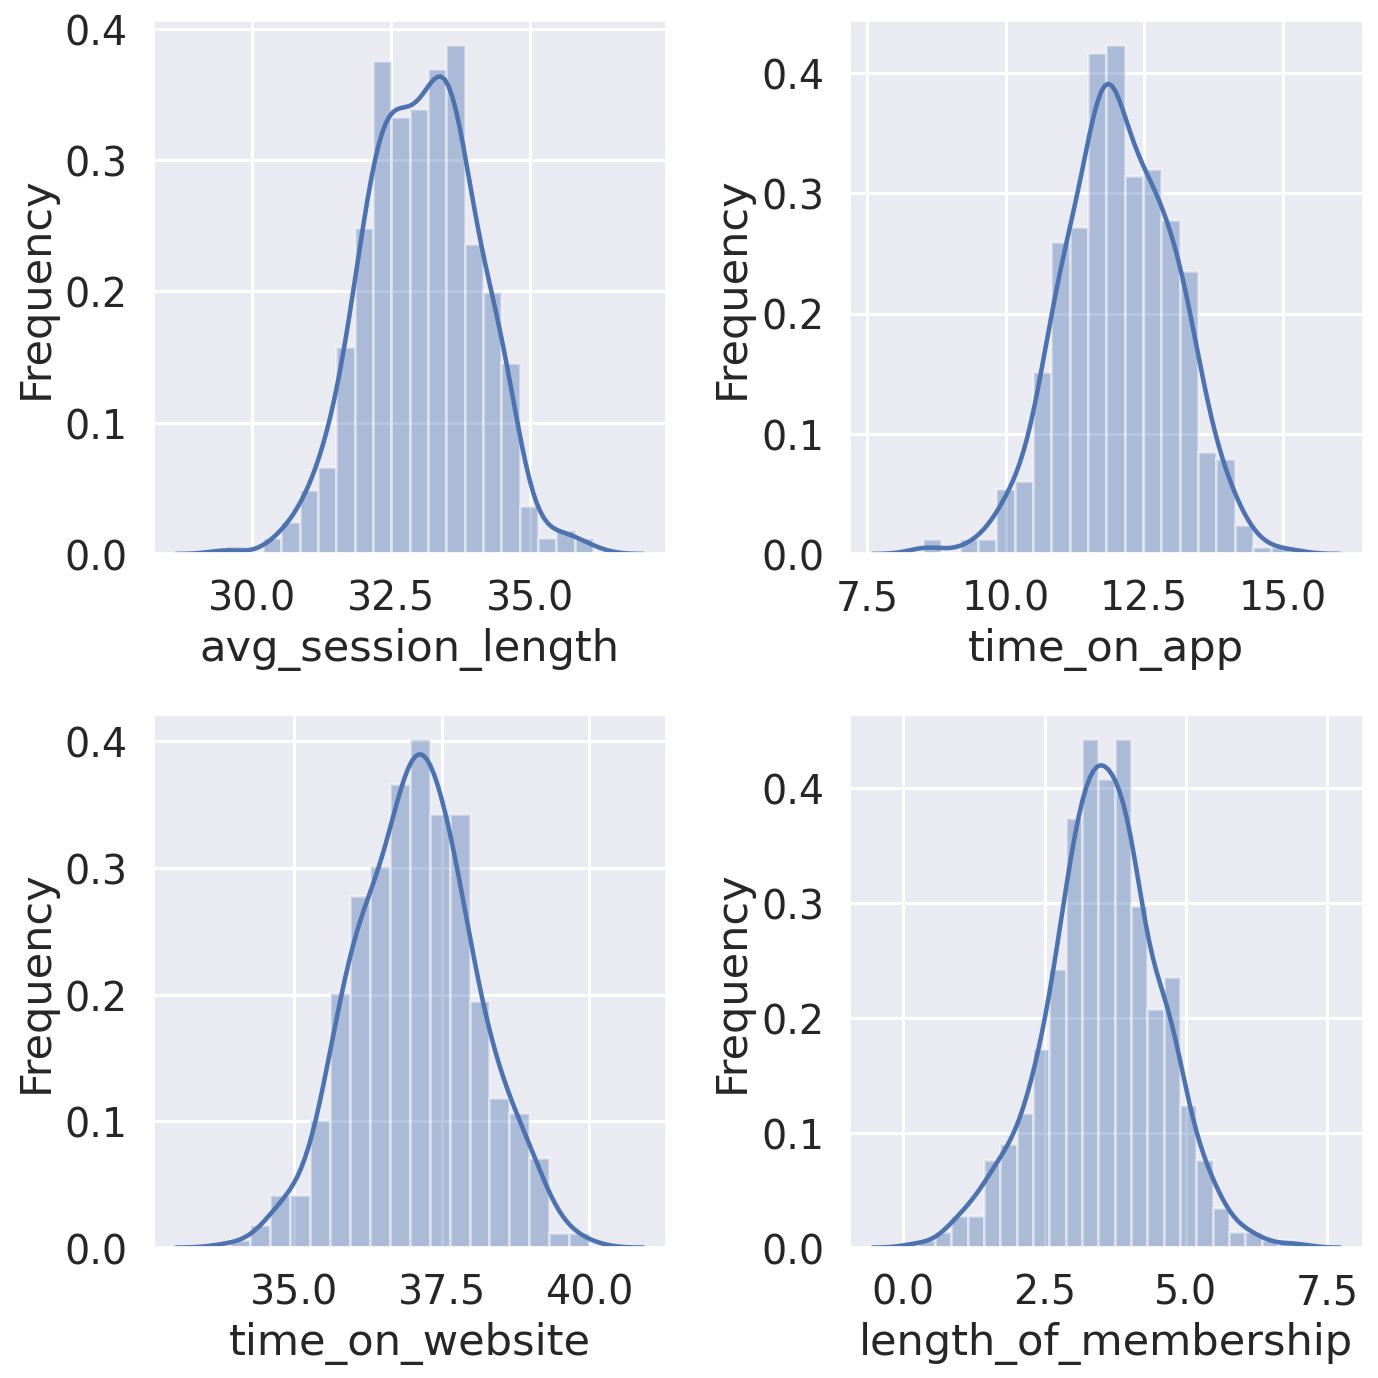

In [ ]:
%config InlineBackend.figure_format = 'retina'
sns.set()

sns.set(rc={'figure.figsize':(10,10)})
sns.set_context("talk", font_scale = 1.2)

for i in range(len(df.columns) - 1):
  plt.subplot(2, 2, i + 1)
  sns.distplot(df[df.columns[i]], kde = True)
  plt.xlabel(df.columns[i])
  plt.ylabel("Frequency")
  plt.tight_layout()
plt.show()

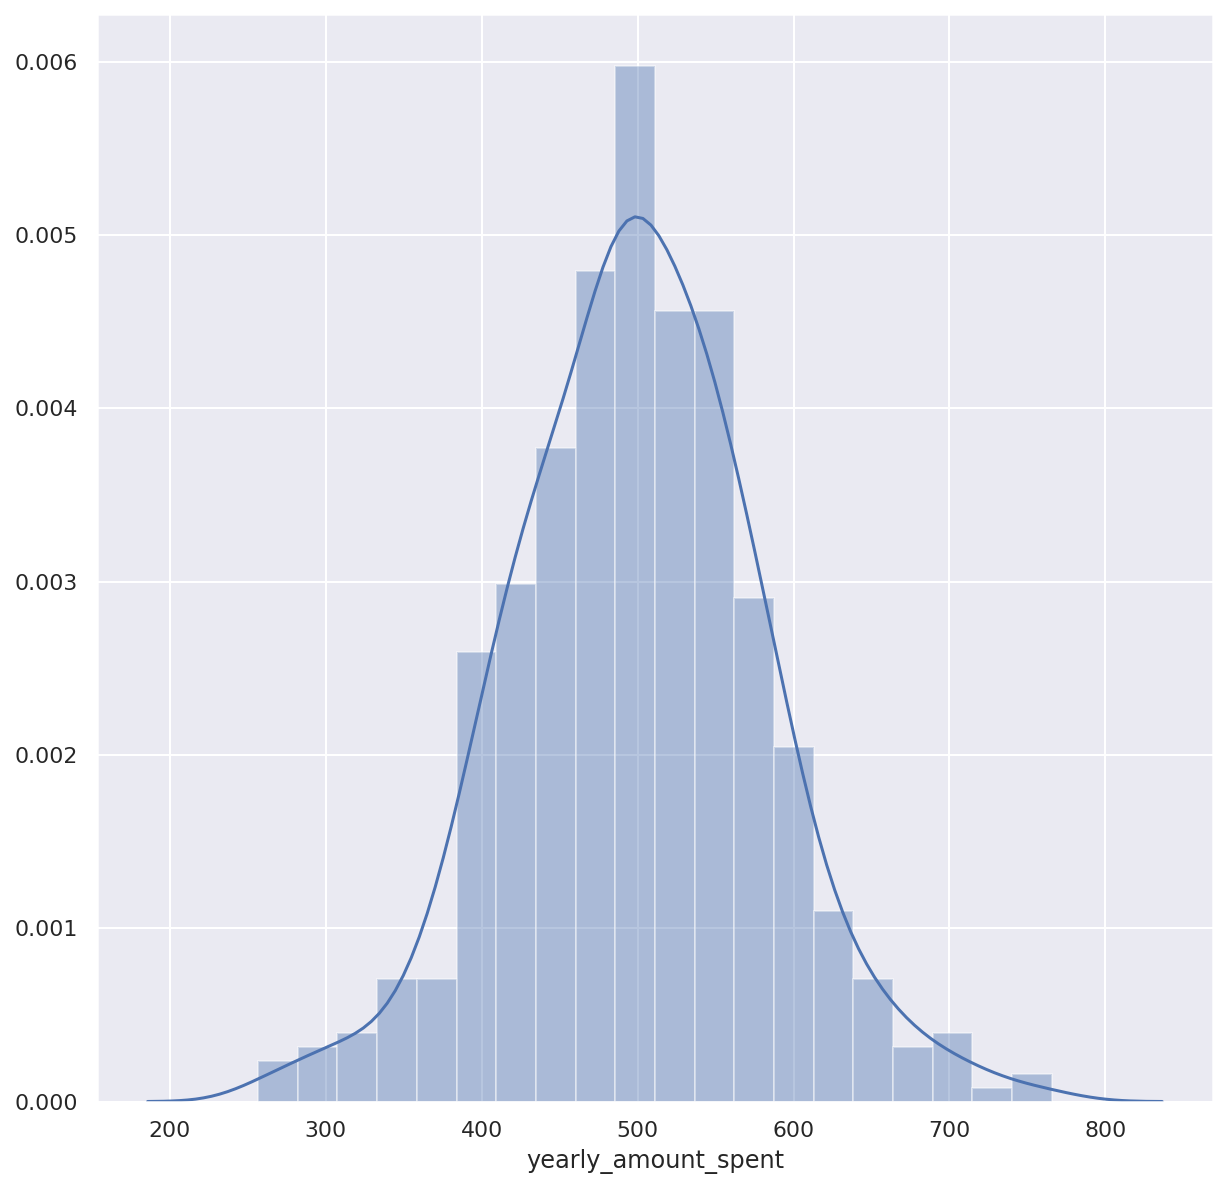

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(df['yearly_amount_spent'], kde = True)
plt.show()

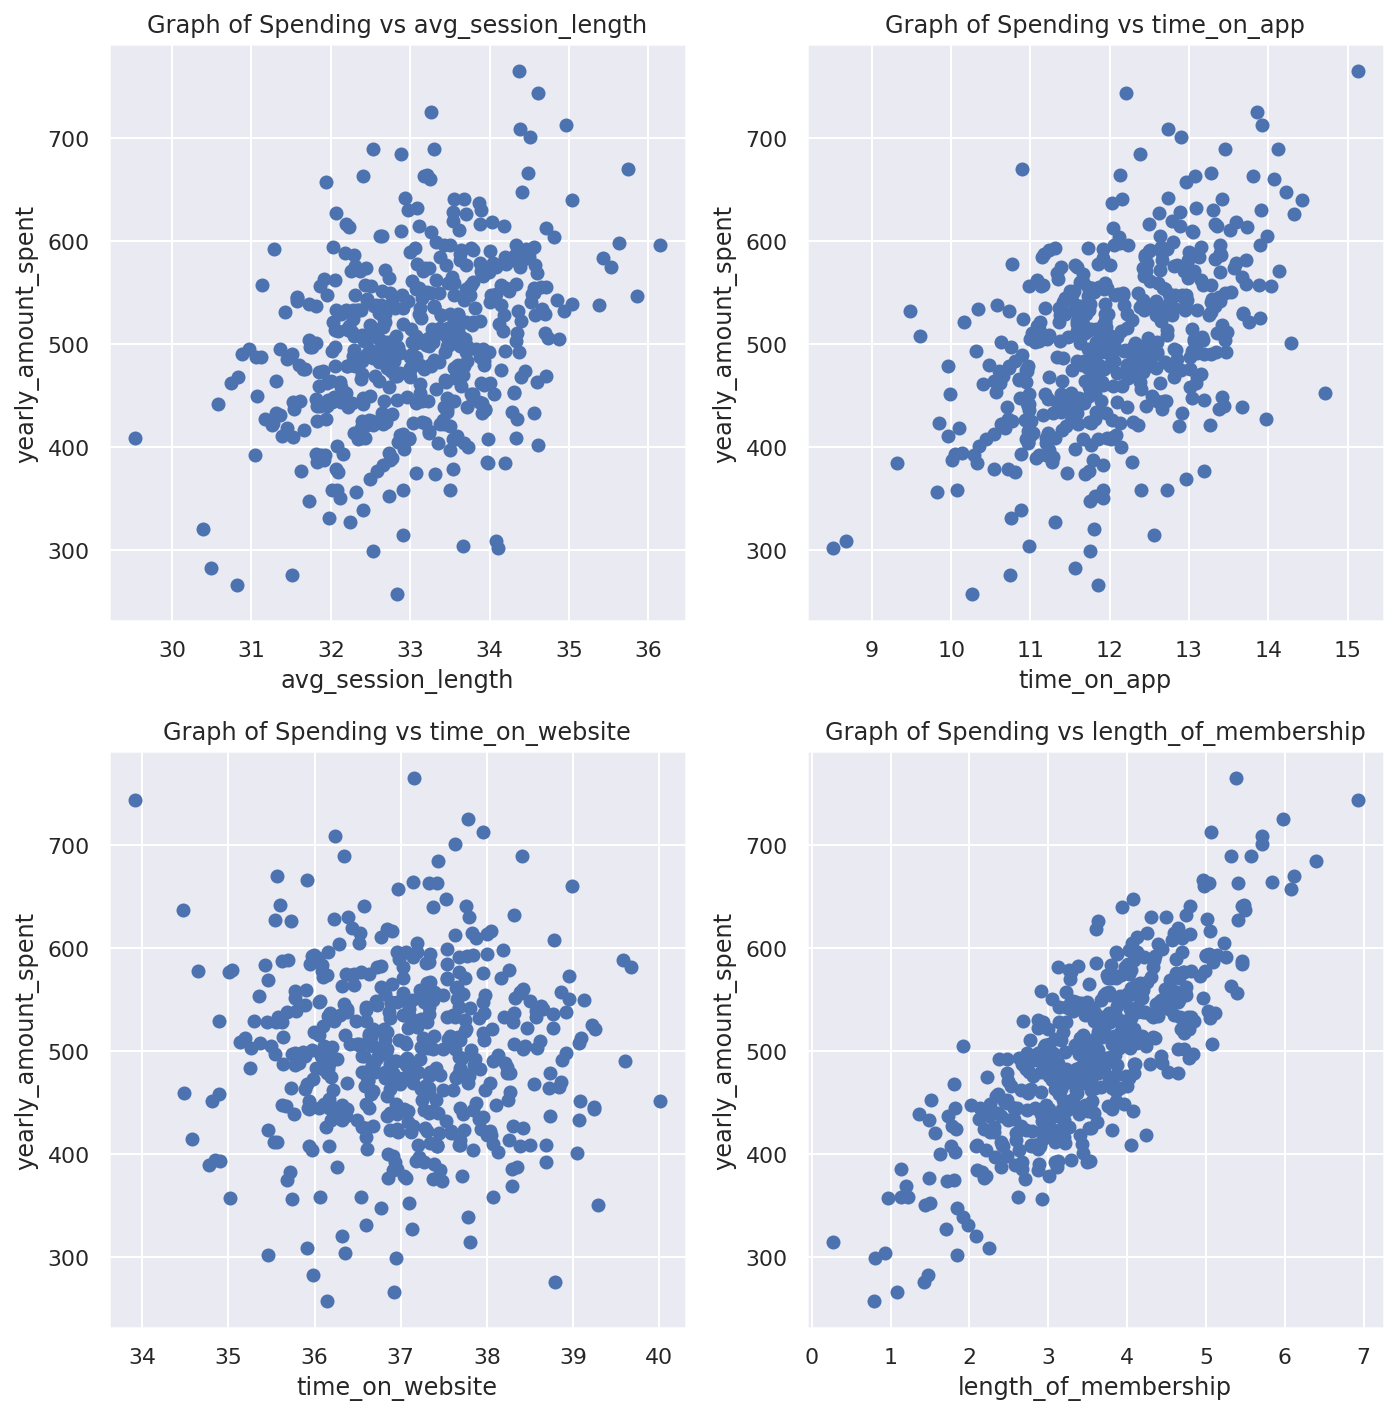

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(len(df.columns) - 1):
  plt.subplot(2, 2, i + 1)
  plt.scatter(df[df.columns[i]], df['yearly_amount_spent'])
  plt.xlabel(df.columns[i])
  plt.ylabel("yearly_amount_spent")
  plt.title("Graph of Spending vs {}".format(df.columns[i]))
plt.tight_layout()
plt.show()

# Section 1: Simple Linear Regression

In [ ]:
def slr(attr):
  print("======={}=======\n".format(attr))
  model = LinearRegression()
  x = df[attr].to_numpy().reshape(-1, 1)
  y = df.yearly_amount_spent.to_numpy()
  n = len(df)

  model.fit(x, y)
  print("b0 = ", model.intercept_)
  print("b1 = ", model.coef_[0])
  y_pred = model.predict(x)

  print("\n============ANOVA============\n")
  SST = np.sum((y - np.mean(y))**2)
  SSE = np.sum((y - y_pred)**2)
  SSR = np.sum((y_pred - np.mean(y))**2)
  print("SST: ", SST, "\t\t|| SSE: ", SSE, "\t|| SSR: ", SSR)

  MSR = SSR
  MSE = SSE / (len(x) - 2)
  F = MSR / MSE
  R2 = (SST - SSE) / SST
  print("MSR: ", MSR, "\t|| MSE: ", MSE, "\t|| F-test: ", F)
  print("Sigma: ", np.sqrt(MSE), "\t|| R2: ", R2)

  print("\n======={}=======\n".format(attr))
  print("T-test\n---------")
  alph = 0.05
  SeB1 = np.sqrt((MSE)/(np.sum(np.power(np.subtract(x, np.mean(x)),2))))
  Tcal = model.coef_[0] / SeB1 # Tcal assume B1-population is zero for Ho
  Tregion = t.ppf((1 - alph / 2), n - 2)
  if np.absolute(Tcal) > Tregion:
    print("T calculated value {} > T in table {}\nHence Ho is rejected, yearly_amount_spent depend on {}".format(Tcal, Tregion, attr))
    print("The confidence interval of b1 => [%f6.4 , %f6.4]"%(model.coef_[0] - Tregion * SeB1, model.coef_[0] + Tregion * SeB1))
  else:
    print("Failed to reject Ho, there is No dependencis between yearly_amount_spend and {}".format(attr))

  print("\nF-test\n---------")
  Fregion = f.ppf((1 - alph) , 1 , n - 2) # F - Test
  if F > Fregion:
    print("F calculated Value {}, > F in table {}\nHence Ho is rejected, yearly_amount_spent depend on {}".format(F, Fregion, attr))
  else:
    print("Failed to reject Ho, there is No dependencies between yearly_amount_spent and {}".format(attr)) 

  plt.figure(figsize = (4, 4))
  plt.plot(df[attr], df['yearly_amount_spent'], 'ro')
  plt.plot(x.reshape(1, -1)[0], y_pred)
  plt.xlabel(attr)
  plt.ylabel("yearly_amount_spent")
  plt.title("Graph of yearly_amount_spent vs {}".format(df.columns[0]))
  plt.show()

=======avg_session_length=======

b0 =  -438.56274367909253
b1 =  28.374770547430963

============ANOVA============

SST:  3139126.45168154 		|| SSE:  2743321.2264826032 	|| SSR:  395805.2251989362
MSR:  395805.2251989362 	|| MSE:  5508.677161611653 	|| F-test:  71.8512291766136
Sigma:  74.2204632268733 	|| R2:  0.12608769710022835

=======avg_session_length=======

T-test
---------
T calculated value 8.476510436294737 > T in table 1.9647389829672648
Hence Ho is rejected, yearly_amount_spent depend on avg_session_length
The confidence interval of b1 => [21.7978876.4 , 34.9516546.4]

F-test
---------
F calculated Value 71.8512291766136, > F in table 3.860199271191399
Hence Ho is rejected, yearly_amount_spent depend on avg_session_length


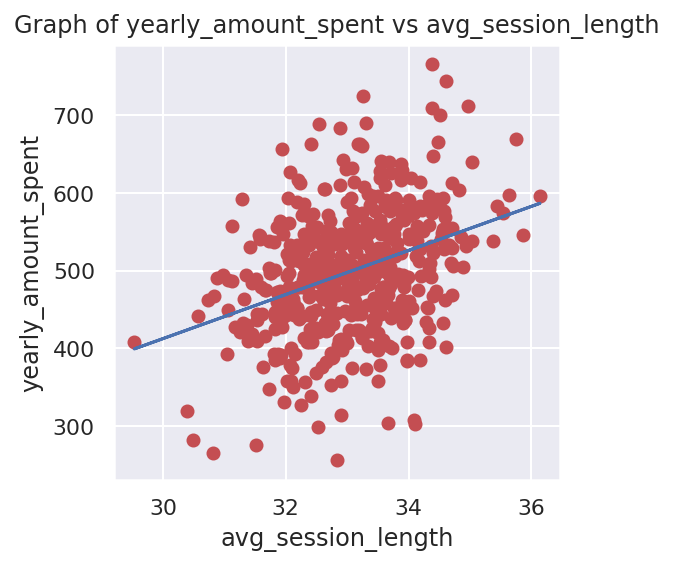

In [ ]:
slr("avg_session_length")

=======time_on_app=======

b0 =  19.209312404784157
b1 =  39.83449129909583

============ANOVA============

SST:  3139126.45168154 		|| SSE:  2356453.6349983793 	|| SSR:  782672.8166831596
MSR:  782672.8166831596 	|| MSE:  4731.83460843048 	|| F-test:  165.40578474334444
Sigma:  68.78833192068609 	|| R2:  0.24932822195292748

=======time_on_app=======

T-test
---------
T calculated value 12.86101802904204 > T in table 1.9647389829672648
Hence Ho is rejected, yearly_amount_spent depend on time_on_app
The confidence interval of b1 => [33.7490966.4 , 45.9198876.4]

F-test
---------
F calculated Value 165.40578474334444, > F in table 3.860199271191399
Hence Ho is rejected, yearly_amount_spent depend on time_on_app


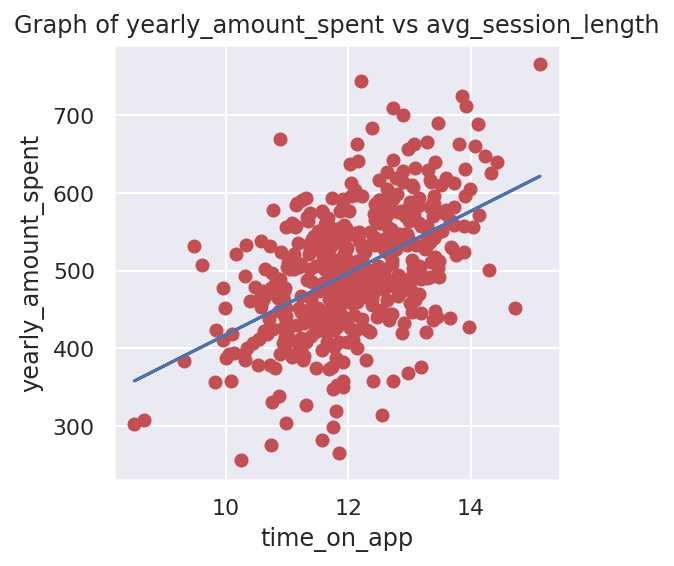

In [ ]:
slr("time_on_app")

=======time_on_website=======

b0 =  506.99606973774
b1 =  -0.20728384102395137

============ANOVA============

SST:  3139126.45168154 		|| SSE:  3139104.55922273 	|| SSR:  21.89245880949389
MSR:  21.89245880949389 	|| MSE:  6303.422809684196 	|| F-test:  0.0034731065122047093
Sigma:  79.39409807841007 	|| R2:  6.974060824557792e-06

=======time_on_website=======

T-test
---------
Failed to reject Ho, there is No dependencis between yearly_amount_spend and time_on_website

F-test
---------
Failed to reject Ho, there is No dependencies between yearly_amount_spent and time_on_website


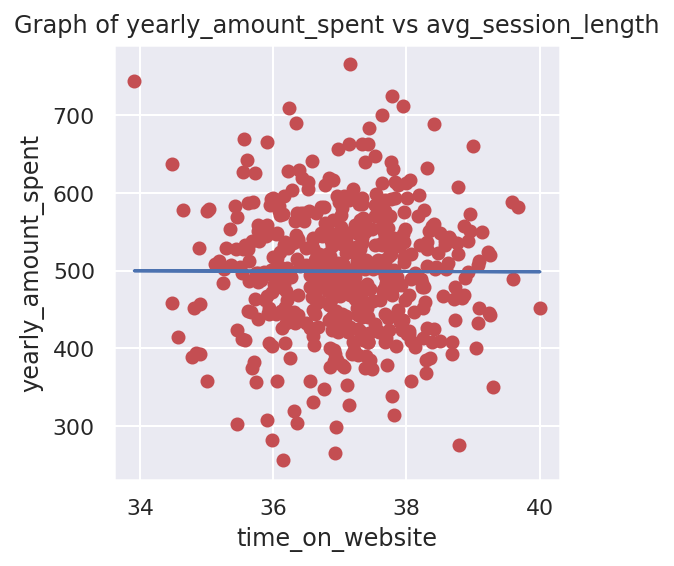

In [ ]:
slr("time_on_website")

=======length_of_membership=======

b0 =  272.3997860603549
b1 =  64.21868431527953

============ANOVA============

SST:  3139126.45168154 		|| SSE:  1084203.3584881509 	|| SSR:  2054923.093193388
MSR:  2054923.093193388 	|| MSE:  2177.11517768705 	|| F-test:  943.8743132444292
Sigma:  46.65956683989951 	|| R2:  0.6546162204114542

=======length_of_membership=======

T-test
---------
T calculated value 30.72253754565904 > T in table 1.9647389829672648
Hence Ho is rejected, yearly_amount_spent depend on length_of_membership
The confidence interval of b1 => [60.1118316.4 , 68.3255386.4]

F-test
---------
F calculated Value 943.8743132444292, > F in table 3.860199271191399
Hence Ho is rejected, yearly_amount_spent depend on length_of_membership


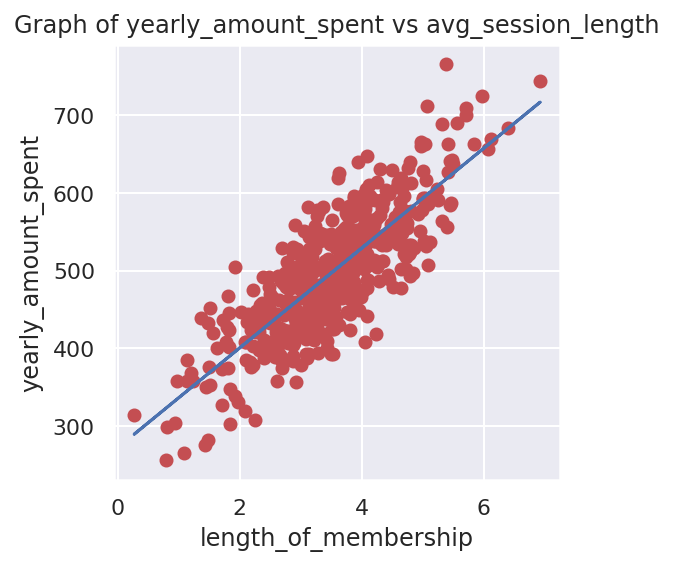

In [ ]:
slr("length_of_membership")

# Section 2: Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

x1 = df.avg_session_length.to_numpy()
x2 = df.time_on_app.to_numpy()
x3 = df.time_on_website.to_numpy()
x4 = df.length_of_membership.to_numpy()
y = df.yearly_amount_spent.to_numpy()
n = len(df)
k = len(df.columns) - 1

x = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "x4": x4})
y = pd.Series(y)

model = LinearRegression()
model.fit(x, y)
print("b0 = ", model.intercept_)
print("b1 = ", model.coef_[0], "\nb2 = ", model.coef_[1], "\nb3 = ", model.coef_[2], "\nb4 = ", model.coef_[3], "\n")
y_pred = model.predict(x)

print("\n============ANOVA============")

SSE = np.sum((y - y_pred)**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SST = np.sum((y - np.mean(y))**2)
print("SST: ", SST, "\t\t|| SSE: ", SSE, "\t|| SSR: ", SSR)

MSR = SSR / k
MSE = SSE / (n - k - 1)
F = MSR / MSE
R2 = 1 - (SSE / SST)
print("MSR: ", MSR, "\t|| MSE: ", MSE, "\t|| F: ", F, "\t|| R2: ", R2)

b0 =  -1051.594254996944
b1 =  25.734271083505504 
b2 =  38.709153813578176 
b3 =  0.43673882831422906 
b4 =  61.577323749790814 


============ANOVA============
SST:  3139126.45168154 		|| SSE:  49235.51262222303 	|| SSR:  3089890.939059321
MSR:  772472.7347648302 	|| MSE:  99.46568206509703 	|| F:  7766.223673601033 	|| R2:  0.9843155370195906


# Section 3: Logistic Regression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Data-Analytics-Assignment1/master/costumer%20database.csv")
df = df.drop(['Email', 'Address', 'Avatar'], axis = 1)
df['avg_session_length'] = df['Avg. Session Length']
df['time_on_app'] = df['Time on App']
df['time_on_website'] = df['Time on Website']
df['length_of_membership'] = df['Length of Membership']
df['yearly_amount_spent'] = df['Yearly Amount Spent']
df = df.drop(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent'], axis = 1)

midpoint = float(df['yearly_amount_spent'].to_numpy().max() + df['yearly_amount_spent'].to_numpy().min()) / 2
df['yearly_amount_spent'] = pd.Series([0  if s < midpoint else 1 for s in df.yearly_amount_spent])
df.head()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,34.497268,12.655651,39.577668,4.082621,1
1,31.926272,11.109461,37.268959,2.664034,0
2,33.000915,11.330278,37.110597,4.104543,0
3,34.305557,13.717514,36.721283,3.120179,1
4,33.330673,12.795189,37.536653,4.446308,1


Logistic Regression Accuracy:  0.964


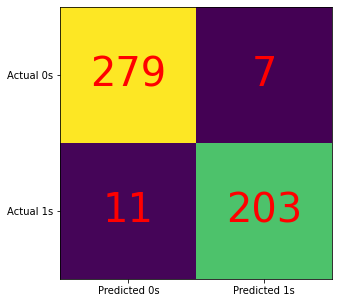

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       286
           1       0.97      0.95      0.96       214

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

x = df.drop("yearly_amount_spent", axis = 1)
y = df['yearly_amount_spent']

model = LogisticRegression()
model.fit(x, y)
y_pred = model.predict(x)
accuracy = model.score(x, y)
print("Logistic Regression Accuracy: ", accuracy)

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red', fontsize = 40)
plt.show()

print(classification_report(y, model.predict(x)))

# Section 4: Naive Bayes

Naive Bayes Accuracy:  0.936


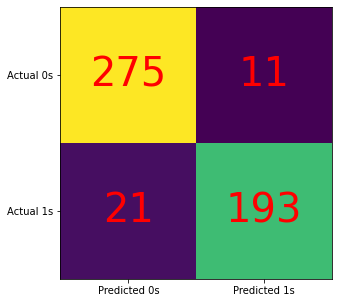

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       286
           1       0.95      0.90      0.92       214

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500



In [ ]:
from sklearn.naive_bayes import GaussianNB

x = df.drop("yearly_amount_spent", axis = 1)
y = df['yearly_amount_spent']

model = GaussianNB()
model.fit(x, y)
y_pred = model.predict(x)
print("Naive Bayes Accuracy: ", model.score(x, y))

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red', fontsize = 40)
plt.show()

print(classification_report(y, model.predict(x)))

# Section 5: Linear Discriminant Analysis

LDA accuracy:  0.958
Intercept of the line:  [-83.38582965]
Coefficient of the line:  [[1.41370947 1.78076409 0.10470436 2.99826899]]


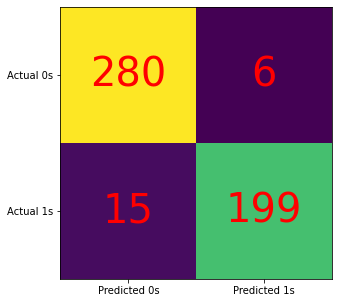

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       286
           1       0.97      0.93      0.95       214

    accuracy                           0.96       500
   macro avg       0.96      0.95      0.96       500
weighted avg       0.96      0.96      0.96       500



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

x = df.drop("yearly_amount_spent", axis = 1)
y = df['yearly_amount_spent']

model = LDA()
model.fit(x, y)

y_pred = model.predict(x)
print("LDA accuracy: ", model.score(x, y))
print("Intercept of the line: ", model.intercept_)
print("Coefficient of the line: ", model.coef_)

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red', fontsize = 40)
plt.show()

print(classification_report(y, model.predict(x)))

# Section 6: Quadratic Discriminant Analysis

QDA accuracy:  0.954


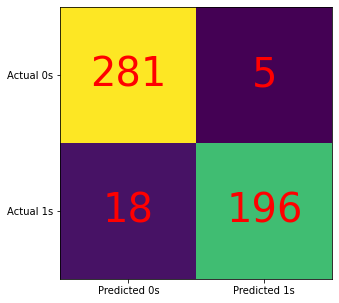

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       286
           1       0.98      0.92      0.94       214

    accuracy                           0.95       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

x = df.drop("yearly_amount_spent", axis = 1)
y = df['yearly_amount_spent']

model = QDA()
model.fit(x, y)

y_pred = model.predict(x)
print("QDA accuracy: ", model.score(x, y))

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red', fontsize = 40)
plt.show()

print(classification_report(y, model.predict(x)))

# Section 7: Principal Component Analysis (PCA)

In [ ]:
country = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Data-Analytics-Assignment1/master/Country-data.csv")
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
from sklearn.decomposition import PCA

country = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Data-Analytics-Assignment1/master/Country-data.csv")
country = country.drop('country', axis = 1)

pca = PCA(n_components = 2)
pca_data = pca.fit(country).transform(country)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])
principal_df

Explained variation per principal component: [0.94792307 0.05207346]


,principal component 1,principal component 2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151
...,...,...
162,-17180.967679,-2487.153835
163,-100.445973,-832.252802
164,-17202.017189,-222.889872
165,-17209.340213,-229.815901


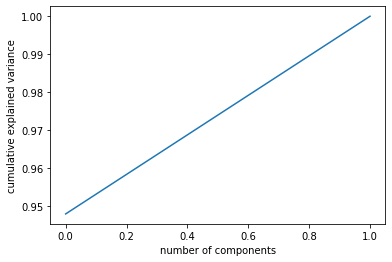

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Section 8: Singular Vector Decomposition (SVD)

In [ ]:
import numpy as np 
import scipy 
from scipy.linalg import svd 

A = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Data-Analytics-Assignment1/master/Country-data.csv")
A = A.drop('country', axis = 1)

U, S, Vt = svd(A)
 
print("U: ", U, "\n") 
print("S: ", S, "\n") 
print("V-transpose: ", Vt)

print(U[0][0] + U[0][1] + U[0][2])

U:  [[-3.64683441e-03 -7.74480085e-03 -1.04434457e-01 ... -2.48363921e-02
  -8.01744598e-02 -1.09311396e-01]
 [-2.35129587e-02 -4.14338548e-02 -5.44062005e-02 ... -1.25510417e-01
  -9.17577217e-03 -6.51725205e-04]
 [-2.92612753e-02 -6.17536695e-02 -4.70183049e-02 ... -3.32352600e-02
  -3.60771176e-02 -2.25951311e-02]
 ...
 [-9.82048538e-03 -2.37501795e-02 -9.98635426e-02 ...  9.63875510e-01
  -7.25818218e-03 -2.86053793e-03]
 [-9.80280116e-03 -2.36688518e-02 -8.40085846e-02 ... -6.38754995e-03
   9.73517253e-01 -1.76789981e-02]
 [-7.93092898e-03 -1.26762558e-02 -9.53267358e-02 ... -1.47461437e-03
  -1.99469044e-02  9.63731047e-01]] 

S:  [4.33547092e+05 8.15635234e+04 1.01650158e+03 4.49350195e+02
 2.98137776e+02 1.49777287e+02 1.09392439e+02 2.67184658e+01
 1.01698190e+01] 

V-transpose:  [[-2.50831759e-04 -1.08749581e-03 -1.44528920e-04 -9.61447024e-04
  -7.57832441e-01 -1.03418990e-04 -1.47130086e-03 -3.91099845e-05
  -6.52445878e-01]
 [-1.42343122e-03 -1.87282758e-03 -1.52840786e-0

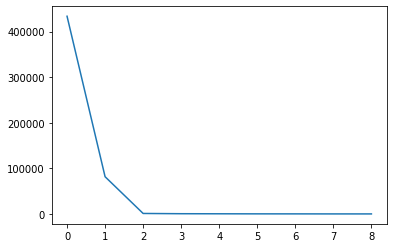

In [ ]:
plt.plot(S)
plt.show()